# Cassification: k-Nearest Neighbors

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
#any further infos on the diabetes dataset:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies:  Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: (years)
- Outcome


In [2]:
df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [3]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

timespreg    0
gluctol      0
diaspb       0
triceps      0
insulin      0
massindex    0
pedigree     0
age          0
target       0
dtype: int64

In [5]:
#basic statistic details about the data
df.describe(include="all")

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


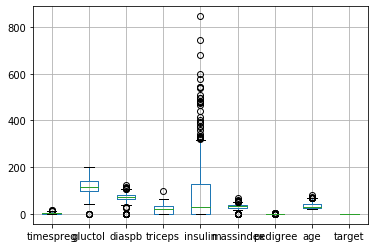

In [6]:
%matplotlib inline
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24d41f2a90>,
      dtype=object)

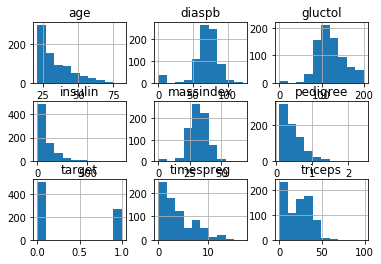

In [7]:
df.hist()

target
0    500
1    268
dtype: int64


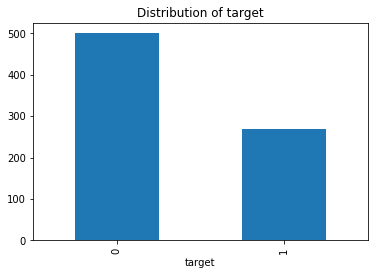

In [8]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=df.groupby('target').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

## Data Preparation 

### Separate Train/Test sets

In [10]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

0    1
1    0
2    1
3    0
4    1
Name: target, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123
                                                   ) #fix random seed for replicability

print(X_train.shape,X_test.shape)

(537, 8) (231, 8)


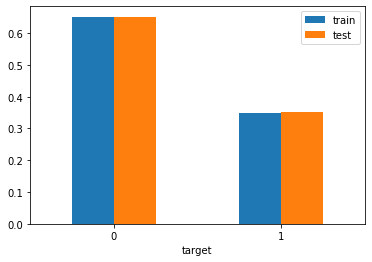

In [12]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

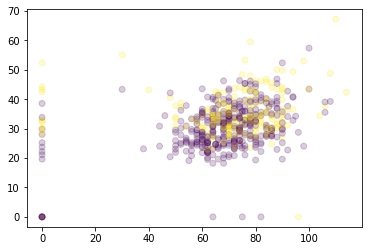

In [14]:
import matplotlib.pyplot as plt

x = X_train.iloc[:,2]
y = X_train.iloc[:,5]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

# A first model: K-Nearest Neighbor

The K-Nearest Neighbor classification model simply assign to new observation the most common value among its k-nearest neighbors

![KNN](KnnClassification.svg)

In [15]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[112  38]
 [ 38  43]]


In [19]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))


***RESULTS ON TEST SET***
F1_score:  0.5308641975308642
Accuracy 0.670995670995671
Recall 0.5308641975308642


## Searching the best parameters

#### DEFINE YOUR GRIDSEARCH 

GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)

Some Parameters:

- estimator : estimator object.
- param_grid : dict or list of dictionaries
- scoring : scoring parameter
- n_jobs : Number of jobs to run in parallel. -1 means using all processors
- cv : cross-validation generator (default 3-fold cross validation)
- verbose : Controls the verbosity: the higher, the more messages.



In [21]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1)

In [22]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(8,), dtype=object).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(6,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(358,), dtype=int64).
Pickling array (shape=(179,), dtype=int64).
Pickling array (shape=(8,), dtype=object).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(6,), dtype=int64).
Pickling array (shape=(5

[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.1s
Pickling array (shape=(8,), dtype=object).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(6,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(358,), dtype=int64).
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.1s
Pickling array (shape=(179,), dtype=int64).
Pickling array (shape=(8,), dtype=object).[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    1.1s

Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (sh

Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(6,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(358,), dtype=int64).
Pickling array (shape=(179,), dtype=int64).
Pickling array (shape=(358,), dtype=int64).
Pickling array (shape=(179,), dtype=int64).
Pickling array (shape=(358,), dtype=int64).
Pickling array (shape=(179,), dtype=int64).
Pickling array (shape=(8,), dtype=object).
Pickling array (shape=(537,), dtype=int64).
Pickling array (shape=(6, 537), dtype=int64).
Pickling array (shape=(2, 537), dtype=float64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(6,), dtype=int64).
Pickling array (shape=(537,),

In [23]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.599885 using {'n_neighbors': 7}
Mean 0.503441 Std (0.011175) with: {'n_neighbors': 1}
Mean 0.416544 Std (0.032890) with: {'n_neighbors': 2}
Mean 0.523167 Std (0.053226) with: {'n_neighbors': 3}
Mean 0.477595 Std (0.068925) with: {'n_neighbors': 4}
Mean 0.557810 Std (0.058966) with: {'n_neighbors': 5}
Mean 0.549743 Std (0.041694) with: {'n_neighbors': 6}
Mean 0.599885 Std (0.044016) with: {'n_neighbors': 7}
Mean 0.562180 Std (0.027379) with: {'n_neighbors': 8}
Mean 0.582689 Std (0.038996) with: {'n_neighbors': 9}
Mean 0.528314 Std (0.049196) with: {'n_neighbors': 10}
Mean 0.571196 Std (0.063104) with: {'n_neighbors': 11}
Mean 0.533911 Std (0.072331) with: {'n_neighbors': 12}
Mean 0.558187 Std (0.051875) with: {'n_neighbors': 13}
Mean 0.513482 Std (0.083722) with: {'n_neighbors': 14}
Mean 0.545210 Std (0.078716) with: {'n_neighbors': 15}
Mean 0.512032 Std (0.082881) with: {'n_neighbors': 16}
Mean 0.510927 Std (0.064095) with: {'n_neighbors': 17}
Mean 0.484862 Std (0.079813)

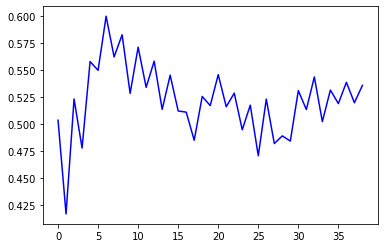

In [24]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [25]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [26]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.6388888888888888
recall:  0.5679012345679012
f1_score:  0.6013071895424836
accuracy:  0.7359307359307359


In [28]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       150
           1       0.64      0.57      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[124  26]
 [ 35  46]]


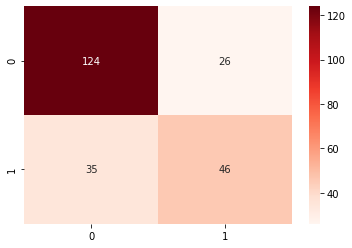

In [30]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format


### ROC Curve

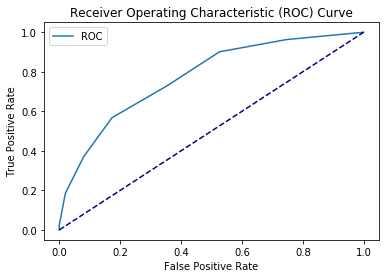

AUC: 0.77


In [31]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Scaling

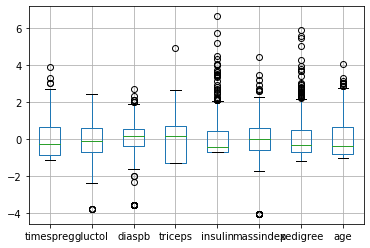

In [32]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

scaled_data = scaler.transform(X.astype(float))
scaled_X = pd.DataFrame(scaled_data.astype(float))
scaled_X.columns = X.columns

scaled_data = scaler.transform(X_train.astype(float))
scaled_X_train = pd.DataFrame(scaled_data.astype(float))
scaled_X_train.columns = X_train.columns

scaled_data = scaler.transform(X_test.astype(float))
scaled_X_test = pd.DataFrame(scaled_data.astype(float))
scaled_X_test.columns = X_test.columns

scaled_X.boxplot()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

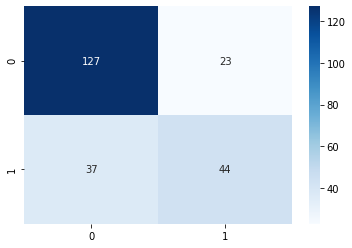

In [33]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,11)}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)
gs = gs.fit(scaled_X_train, y_train)

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(scaled_X_test)


print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


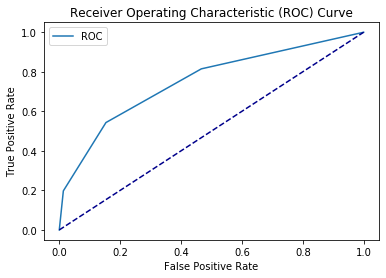

AUC: 0.75


In [36]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

y_probs = model.predict_proba(scaled_X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Apply PCA

In [37]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X)
df_pca = pd.DataFrame(pca.transform(scaled_X))

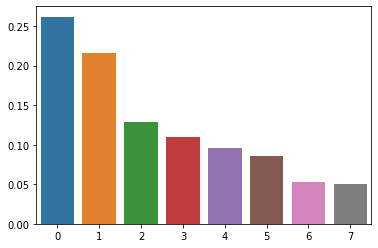

In [38]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

In [39]:
pd.DataFrame(pca.components_,columns=X.columns)

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age
0,0.128432,0.393083,0.360003,0.439824,0.435026,0.451941,0.270611,0.198027
1,0.593786,0.174029,0.183892,-0.331965,-0.250781,-0.100960,-0.122069,0.620589
2,-0.013087,0.467923,-0.535494,-0.237674,0.336709,-0.361865,0.433189,0.075248
3,0.080691,-0.404329,0.055986,0.037976,-0.349944,0.053646,0.833680,0.071201
4,-0.475606,0.466328,0.327953,-0.487862,-0.346935,0.253204,0.119810,-0.109290
5,0.193598,0.094162,-0.634116,0.009589,-0.270651,0.685372,-0.085784,-0.033357
6,-0.588790,-0.060153,-0.192118,0.282213,-0.132010,-0.035366,-0.086091,0.712085
7,0.117841,0.450355,-0.011296,0.566284,-0.548621,-0.341518,-0.008259,-0.211662


In [40]:
X_pca = pd.DataFrame(data = pca.transform(scaled_X)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])

X_train_pca = pd.DataFrame(data = pca.transform(scaled_X_train)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])

X_test_pca = pd.DataFrame(data = pca.transform(scaled_X_test)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])


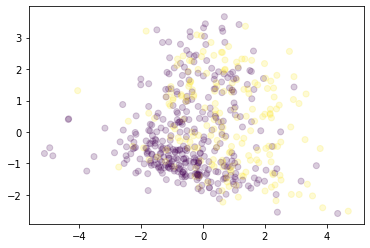

In [41]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

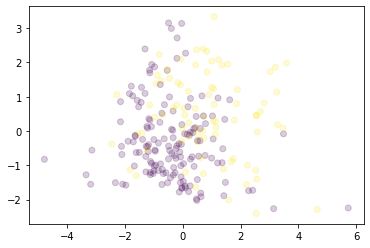

In [42]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_test )
plt.show()

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0150s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 task

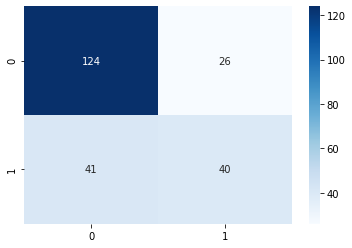

In [45]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,20)}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=50, n_jobs=-1)
# We use just the two first PC
gs = gs.fit(X_train_pca.iloc[:,:2], y_train) 

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:2])

print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


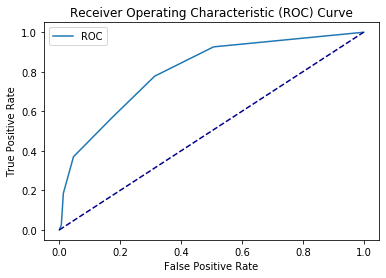

AUC: 0.80


In [44]:
#Using the three first PC
X_train_pca_2=X_train_pca.iloc[:,:3]
X_test_pca_2=X_test_pca.iloc[:,:3]

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_pca_2, y_train)
y_pred = model.predict(X_test_pca_2)

y_probs = model.predict_proba(X_test_pca_2) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

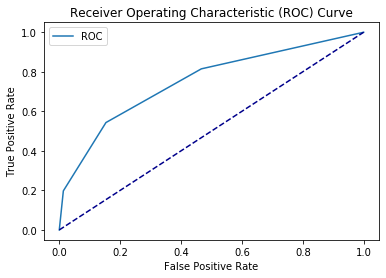

AUC: 0.75


In [46]:
# and with all PC

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

y_probs = model.predict_proba(X_test_pca) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)